In [1]:
import os
import scipy
import numpy as np
import matplotlib.pyplot as plt
import obspy
import pickle
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
import util
import pandas as pd

In [2]:
root = '/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m3/' #2018_2021_global_m5/'#'/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m5/'
eq_list = os.listdir(root)

In [3]:
client = Client("IRIS")
# cat = client.get_events(starttime=UTCDateTime("2019-06-26"), endtime=UTCDateTime("2020-06-26"), minlongitude=-179, maxlongitude=-145, minlatitude=42, maxlatitude=71, minmagnitude=5, includearrivals=True)
cat = obspy.read_events('/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m3_catalog.xml') #2018_2021_global_m5_catalog.xml')
dists = []

In [4]:
eq_with_data = []
cat_with_data = cat.copy()
cat_with_data.clear()
for event in cat:
    eq_name = util.catEventToFileName(event)
    if os.path.isdir(root+eq_name) and os.path.isdir(root+eq_name+'/station_xml_files'):
        eq_with_data.append(eq_name)
        cat_with_data.extend([event])
        

In [5]:
for eq_name in eq_with_data[0:1]:
    print(eq_name)

20190131_194949.a


In [6]:
counts = pd.DataFrame({'3.0':[0, 0, 0, 0, 0, 0, 0, 0],
                       '3.1':[0, 0, 0, 0, 0, 0, 0, 0],
                       '3.2':[0, 0, 0, 0, 0, 0, 0, 0],
                       '3.3':[0, 0, 0, 0, 0, 0, 0, 0],
                       '3.4':[0, 0, 0, 0, 0, 0, 0, 0],
                       '3.5':[0, 0, 0, 0, 0, 0, 0, 0],
                       '3.6':[0, 0, 0, 0, 0, 0, 0, 0],
                       '3.7':[0, 0, 0, 0, 0, 0, 0, 0],
                       '3.8':[0, 0, 0, 0, 0, 0, 0, 0],
                       '3.9':[0, 0, 0, 0, 0, 0, 0, 0],
                       '4.0':[0, 0, 0, 0, 0, 0, 0, 0],
                       '4.1':[0, 0, 0, 0, 0, 0, 0, 0],
                       '4.2':[0, 0, 0, 0, 0, 0, 0, 0],
                       '4.3':[0, 0, 0, 0, 0, 0, 0, 0],
                       '4.4':[0, 0, 0, 0, 0, 0, 0, 0],
                       '4.5':[0, 0, 0, 0, 0, 0, 0, 0],
                       '4.6':[0, 0, 0, 0, 0, 0, 0, 0],
                       '4.7':[0, 0, 0, 0, 0, 0, 0, 0],
                       '4.8':[0, 0, 0, 0, 0, 0, 0, 0],
                       '4.9':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.0':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.1':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.2':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.3':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.4':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.5':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.6':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.7':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.8':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.9':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.0':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.1':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.2':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.3':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.4':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.5':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.6':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.7':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.8':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.9':[0, 0, 0, 0, 0, 0, 0, 0],
                       '7.0':[0, 0, 0, 0, 0, 0, 0, 0]})

In [7]:
iv2 = pd.DataFrame({'3.0':[[], [], [], [], [], [], [], []],
                   '3.1':[[], [], [], [], [], [], [], []],
                   '3.2':[[], [], [], [], [], [], [], []],
                   '3.3':[[], [], [], [], [], [], [], []],
                   '3.4':[[], [], [], [], [], [], [], []],
                   '3.5':[[], [], [], [], [], [], [], []],
                   '3.6':[[], [], [], [], [], [], [], []],
                   '3.7':[[], [], [], [], [], [], [], []],
                   '3.8':[[], [], [], [], [], [], [], []],
                   '3.9':[[], [], [], [], [], [], [], []],
                   '4.0':[[], [], [], [], [], [], [], []],
                   '4.1':[[], [], [], [], [], [], [], []],
                   '4.2':[[], [], [], [], [], [], [], []],
                   '4.3':[[], [], [], [], [], [], [], []],
                   '4.4':[[], [], [], [], [], [], [], []],
                   '4.5':[[], [], [], [], [], [], [], []],
                   '4.6':[[], [], [], [], [], [], [], []],
                   '4.7':[[], [], [], [], [], [], [], []],
                   '4.8':[[], [], [], [], [], [], [], []],
                   '4.9':[[], [], [], [], [], [], [], []],
                   '5.0':[[], [], [], [], [], [], [], []],
                   '5.1':[[], [], [], [], [], [], [], []],
                   '5.2':[[], [], [], [], [], [], [], []],
                   '5.3':[[], [], [], [], [], [], [], []],
                   '5.4':[[], [], [], [], [], [], [], []],
                   '5.5':[[], [], [], [], [], [], [], []],
                   '5.6':[[], [], [], [], [], [], [], []],
                   '5.7':[[], [], [], [], [], [], [], []],
                   '5.8':[[], [], [], [], [], [], [], []],
                   '5.9':[[], [], [], [], [], [], [], []],
                   '6.0':[[], [], [], [], [], [], [], []],
                   '6.1':[[], [], [], [], [], [], [], []],
                   '6.2':[[], [], [], [], [], [], [], []],
                   '6.3':[[], [], [], [], [], [], [], []],
                   '6.4':[[], [], [], [], [], [], [], []],
                   '6.5':[[], [], [], [], [], [], [], []],
                   '6.6':[[], [], [], [], [], [], [], []],
                   '6.7':[[], [], [], [], [], [], [], []],
                   '6.8':[[], [], [], [], [], [], [], []],
                   '6.9':[[], [], [], [], [], [], [], []],
                   '7.0':[[], [], [], [], [], [], [], []]})

In [14]:
eq_no = 0
list_mag = []
list_dist = []
list_iv2 = []
for eq_name in eq_with_data[0:100]:
    print(str(eq_no) + ' out of '+ str(len(eq_with_data)))# find matching cat event:
    eq_no += 1
    for event in cat_with_data:
        if eq_name == util.catEventToFileName(event):
            cat_entry = event
            break

    eq_lat= cat_entry.origins[0].latitude
    eq_long = cat_entry.origins[0].longitude
    eq_mag = cat_entry.magnitudes[0].mag
    eq_mag_str = "{:.1f}".format(eq_mag)

    data = obspy.read(root+eq_name+'/data/*/*')
    data.interpolate(100, 'lanczos', a = 20)
    inv = obspy.read_inventory(root+eq_name+'/station_xml_files/*')
    print('data read')
    with open(root+eq_name+'/picks.pkl', 'rb') as f:
        picks = pickle.load(f)
    n_records = 0
    sampling_rate = 100 # get this from tr.stats.sampling_rate
    # sensor_types = self.data_stats['sensor_types'] for automated OOP
    print('start for')
    for i in range(0, len(data)):  # iterate through all traces
        tr_name = data[i].stats.network+'.'+data[i].stats.station+'.'+data[i].stats.location
        if data[i].stats.channel[2] == 'Z' and tr_name in picks.keys():  # only use vertical components at stations with a pick
            from obspy import UTCDateTime
            IV2 = []
            count = 0
            for i in range(0, len(data)):
                if data[i].stats.channel[2] == 'Z':
                    tr = data[i].copy()
                    station = tr.stats.station
                    station = station.ljust(4)
                    sta_lat = inv.select(network = tr.stats.network, station = tr.stats.station)[0][0].latitude
                    sta_long = inv.select(network = tr.stats.network, station = tr.stats.station)[0][0].longitude
                    distance = np.sqrt((eq_lat - sta_lat)**2 + (eq_long - sta_long)**2) * 110
                    tr_name = tr.stats.network+'.'+tr.stats.station+'.'+tr.stats.location
                    
                    if tr_name in picks.keys() and distance < 200:
                        # load saved parameters
                        tr.remove_response(inv)
                        pick = picks[tr_name]
                        pick = UTCDateTime(picks[tr_name])
                        pick_samples = int(round((UTCDateTime(pick) - tr.stats.starttime)*tr.stats.sampling_rate, 0))                            
                        
                        snr = max(abs(tr.data[pick_samples:500+pick_samples]))/max(abs(tr.data[pick_samples-700:pick_samples-200]))
                        sampling_rate = tr.stats.sampling_rate
                        if snr>10:
                            start = int((pick - tr.stats.starttime)*sampling_rate)
                            end = int(start + 3 * sampling_rate)

                            vel = tr.copy()
                            #vel.trim(start, end)
                            v2 = vel.copy()
                            v2.data = vel.data[start:end]**2
                            iv2_this = v2.integrate()
                            print(iv2_this.data[-1])
                            current = iv2[eq_mag_str][int(distance//25)]
                            current.append(iv2_this.data[-1])
                            iv2[eq_mag_str][int(distance//25)]= current
                            list_iv2.append(iv2_this.data[-1]*)
                            list_mag.append(eq_mag)
                            list_dist.append(distance)
                            counts[eq_mag_str][int(distance//25)] = counts[str(np.floor(eq_mag))][int(distance//25)]  + 1
                            #vel_HP = vel.copy() # V_HP
            

0 out of 6077
data read
start for
8.3060018694e-10
5.23474235573e-09
7.03519253033e-09
8.3060018694e-10
5.23474235573e-09
7.03519253033e-09
8.3060018694e-10
5.23474235573e-09
7.03519253033e-09
1 out of 6077
data read
start for
2 out of 6077
data read
start for
3 out of 6077
data read
start for
4 out of 6077
data read
start for
1.60953753288e-11
3.97607323966e-10
6.93210636979e-10
7.59375980206e-11
9.60502766074e-11
2.38862037752e-10
2.96354019287e-11
1.60953753288e-11
3.97607323966e-10
6.93210636979e-10
7.59375980206e-11
9.60502766074e-11
2.38862037752e-10
2.96354019287e-11
1.60953753288e-11
3.97607323966e-10
6.93210636979e-10
7.59375980206e-11
9.60502766074e-11
2.38862037752e-10
2.96354019287e-11
1.60953753288e-11
3.97607323966e-10
6.93210636979e-10
7.59375980206e-11
9.60502766074e-11
2.38862037752e-10
2.96354019287e-11
1.60953753288e-11
3.97607323966e-10
6.93210636979e-10
7.59375980206e-11
9.60502766074e-11
2.38862037752e-10
2.96354019287e-11
1.60953753288e-11
3.97607323966e-10
6.932

9.37472981386e-11
3.416173411e-10
1.38786512866e-09
1.52565942957e-11
3.91270940574e-10
2.13097142312e-11
3.19438682374e-11
1.86533571226e-09
5.17451335736e-10
1.42741241363e-10
8.17646249143e-09
1.52198561136e-10
2.19096460964e-10
4.08265619129e-11
3.76305883515e-11
7.65950385457e-11
5.17664592122e-10
1.31181023857e-09
5.89011382849e-11
1.5661214375e-11
5.10293866674e-11
2.48102753796e-11
1.03411501871e-10
6.59998881629e-09
2.31247148499e-10
3.37492085542e-11
2.95236497099e-10
4.4877454139e-10
2.47216219415e-11
7.61907369503e-11
5.76482216437e-11
4.61560449372e-08
4.75185568933e-08
1.45746783463e-11
2.64307314356e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
19 out of 6077
data read
start for
20 out of 6077
data read
start for
21 out of 6077
data read
start for
1.39135304498e-08


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.18508640256e-09
1.39135304498e-08


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.18508640256e-09
22 out of 6077
data read
start for
23 out of 6077
data read
start for
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697e-11
4.56587310257e-11
1.71268847745e-11
2.35975237147e-11
1.41502042466e-10
1.06413874342e-07
2.94628582159e-09
6.91755076512e-11
4.4208212459e-1

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
24 out of 6077
data read
start for
7.31523765716e-11
25 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


data read
start for
26 out of 6077
data read
start for
9.65265248771e-08
4.73699478295e-07
9.65265248771e-08
4.73699478295e-07
27 out of 6077
data read
start for
28 out of 6077
data read
start for
5.44921670173e-10
5.13728388818e-09
1.12803474235e-10
4.1934391855e-10
1.1324938888e-09
1.17057955797e-11
1.31007430171e-11
1.03751657393e-10
5.44921670173e-10
5.13728388818e-09
1.12803474235e-10
4.1934391855e-10
1.1324938888e-09
1.17057955797e-11
1.31007430171e-11
1.03751657393e-10
5.44921670173e-10
5.13728388818e-09
1.12803474235e-10
4.1934391855e-10
1.1324938888e-09
1.17057955797e-11
1.31007430171e-11
1.03751657393e-10
5.44921670173e-10
5.13728388818e-09
1.12803474235e-10
4.1934391855e-10
1.1324938888e-09
1.17057955797e-11
1.31007430171e-11
1.03751657393e-10
5.44921670173e-10
5.13728388818e-09
1.12803474235e-10
4.1934391855e-10
1.1324938888e-09
1.17057955797e-11
1.31007430171e-11
1.03751657393e-10
5.44921670173e-10
5.13728388818e-09
1.12803474235e-10
4.1934391855e-10
1.1324938888e-09
1.170

3.69201274969e-08
1.70516248e-10
5.66741876078e-10
7.56635200923e-08
2.44411800444e-10
4.58922837595e-10
2.73995568349e-10
2.0754354506e-10
1.84277289953e-09
1.0831871169e-10
4.08446093519e-09
3.69201274969e-08
1.70516248e-10
5.66741876078e-10
7.56635200923e-08
2.44411800444e-10
4.58922837595e-10
2.73995568349e-10
2.0754354506e-10
1.84277289953e-09
1.0831871169e-10
4.08446093519e-09
3.69201274969e-08
1.70516248e-10
5.66741876078e-10
7.56635200923e-08
2.44411800444e-10
4.58922837595e-10
2.73995568349e-10
2.0754354506e-10
1.84277289953e-09
1.0831871169e-10
4.08446093519e-09
3.69201274969e-08
1.70516248e-10
5.66741876078e-10
7.56635200923e-08
2.44411800444e-10
4.58922837595e-10
2.73995568349e-10
2.0754354506e-10
1.84277289953e-09
1.0831871169e-10
4.08446093519e-09
3.69201274969e-08
1.70516248e-10
5.66741876078e-10
7.56635200923e-08
2.44411800444e-10
4.58922837595e-10
2.73995568349e-10
2.0754354506e-10
1.84277289953e-09
1.0831871169e-10
4.08446093519e-09
3.69201274969e-08
1.70516248e-10
5.

2.25515263742e-11
5.30353367047e-11
7.55609073052e-11
47 out of 6077
data read
start for
1.30037339276e-09
4.55016788123e-10
1.5254887422e-10
2.1801081601e-09
4.40222243141e-11
2.68676817844e-11
3.12097218451e-11
1.30037339276e-09
4.55016788123e-10
1.5254887422e-10
2.1801081601e-09
4.40222243141e-11
2.68676817844e-11
3.12097218451e-11
1.30037339276e-09
4.55016788123e-10
1.5254887422e-10
2.1801081601e-09
4.40222243141e-11
2.68676817844e-11
3.12097218451e-11
1.30037339276e-09
4.55016788123e-10
1.5254887422e-10
2.1801081601e-09
4.40222243141e-11
2.68676817844e-11
3.12097218451e-11
1.30037339276e-09
4.55016788123e-10
1.5254887422e-10
2.1801081601e-09
4.40222243141e-11
2.68676817844e-11
3.12097218451e-11
1.30037339276e-09
4.55016788123e-10
1.5254887422e-10
2.1801081601e-09
4.40222243141e-11
2.68676817844e-11
3.12097218451e-11
1.30037339276e-09
4.55016788123e-10
1.5254887422e-10
2.1801081601e-09
4.40222243141e-11
2.68676817844e-11
3.12097218451e-11
1.30037339276e-09
4.55016788123e-10
1.52548

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.94047026929e-08
1.50783551121e-09
6.92764249997e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.94047026929e-08
1.50783551121e-09
6.92764249997e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.94047026929e-08
1.50783551121e-09
6.92764249997e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


51 out of 6077
data read
start for
6.9792756817e-08
2.72883982596e-08
1.93225646651e-10
1.95840688046e-10
5.92373717945e-11
7.12161483366e-11
7.12060597199e-11
7.72204433888e-10
3.26600250312e-10
6.9792756817e-08
2.72883982596e-08
1.93225646651e-10
1.95840688046e-10
5.92373717945e-11
7.12161483366e-11
7.12060597199e-11
7.72204433888e-10
3.26600250312e-10
6.9792756817e-08
2.72883982596e-08
1.93225646651e-10
1.95840688046e-10
5.92373717945e-11
7.12161483366e-11
7.12060597199e-11
7.72204433888e-10
3.26600250312e-10
6.9792756817e-08
2.72883982596e-08
1.93225646651e-10
1.95840688046e-10
5.92373717945e-11
7.12161483366e-11
7.12060597199e-11
7.72204433888e-10
3.26600250312e-10
6.9792756817e-08
2.72883982596e-08
1.93225646651e-10
1.95840688046e-10
5.92373717945e-11
7.12161483366e-11
7.12060597199e-11
7.72204433888e-10
3.26600250312e-10
6.9792756817e-08
2.72883982596e-08
1.93225646651e-10
1.95840688046e-10
5.92373717945e-11
7.12161483366e-11
7.12060597199e-11
7.72204433888e-10
3.26600250312e-10

2.91437741504e-11
9.07396844183e-10
5.43680827472e-11
3.06276536277e-11
4.9552881873e-11
1.55611533416e-09
6.60536778307e-11
1.27944374489e-10
6.51938376667e-11
1.97133463583e-10
3.45046450616e-12
8.51193201481e-12
9.79788930557e-10
1.02405256381e-09
2.91841977026e-11
2.36700949201e-10
4.64247713788e-09
9.88854423469e-10
8.22481563827e-09
1.68873924737e-11
5.96369891587e-12
1.23517352564e-08
1.46107615211e-10
3.64494284377e-10
4.84127337803e-10
5.46490067823e-11
6.67375383102e-12
7.94654345211e-12
4.11386643175e-12
4.91416994427e-12
9.80764052771e-12
6.0321018382e-12
5.48659429791e-12
8.2481238663e-12
9.0949847986e-12
3.54042972352e-12
6.41596697313e-12
3.59217392178e-12
2.29999619623e-10
1.75622883846e-08
1.09605476324e-11
1.09003530809e-10
5.08434224464e-09
1.11182463268e-10
2.91437741504e-11
9.07396844183e-10
5.43680827472e-11
3.06276536277e-11
4.9552881873e-11
1.55611533416e-09
6.60536778307e-11
1.27944374489e-10
6.51938376667e-11
1.97133463583e-10
3.45046450616e-12
8.51193201481e-

1.68873924737e-11
5.96369891587e-12
1.23517352564e-08
1.46107615211e-10
3.64494284377e-10
4.84127337803e-10
5.46490067823e-11
6.67375383102e-12
7.94654345211e-12
4.11386643175e-12
4.91416994427e-12
9.80764052771e-12
6.0321018382e-12
5.48659429791e-12
8.2481238663e-12
9.0949847986e-12
3.54042972352e-12
6.41596697313e-12
3.59217392178e-12
2.29999619623e-10
1.75622883846e-08
1.09605476324e-11
1.09003530809e-10
5.08434224464e-09
1.11182463268e-10
2.91437741504e-11
9.07396844183e-10
5.43680827472e-11
3.06276536277e-11
4.9552881873e-11
1.55611533416e-09
6.60536778307e-11
1.27944374489e-10
6.51938376667e-11
1.97133463583e-10
3.45046450616e-12
8.51193201481e-12
9.79788930557e-10
1.02405256381e-09
2.91841977026e-11
2.36700949201e-10
4.64247713788e-09
9.88854423469e-10
8.22481563827e-09
1.68873924737e-11
5.96369891587e-12
1.23517352564e-08
1.46107615211e-10
3.64494284377e-10
4.84127337803e-10
5.46490067823e-11
6.67375383102e-12
7.94654345211e-12
4.11386643175e-12
4.91416994427e-12
9.80764052771e

3.59217392178e-12
2.29999619623e-10
1.75622883846e-08
1.09605476324e-11
1.09003530809e-10
5.08434224464e-09
1.11182463268e-10
2.91437741504e-11
9.07396844183e-10
5.43680827472e-11
3.06276536277e-11
4.9552881873e-11
1.55611533416e-09
6.60536778307e-11
1.27944374489e-10
6.51938376667e-11
1.97133463583e-10
3.45046450616e-12
8.51193201481e-12
9.79788930557e-10
1.02405256381e-09
2.91841977026e-11
2.36700949201e-10
4.64247713788e-09
9.88854423469e-10
8.22481563827e-09
1.68873924737e-11
5.96369891587e-12
1.23517352564e-08
1.46107615211e-10
3.64494284377e-10
4.84127337803e-10
5.46490067823e-11
6.67375383102e-12
7.94654345211e-12
4.11386643175e-12
4.91416994427e-12
9.80764052771e-12
6.0321018382e-12
5.48659429791e-12
8.2481238663e-12
9.0949847986e-12
3.54042972352e-12
6.41596697313e-12
3.59217392178e-12
2.29999619623e-10
1.75622883846e-08
1.09605476324e-11
1.09003530809e-10
5.08434224464e-09
1.11182463268e-10
2.91437741504e-11
9.07396844183e-10
5.43680827472e-11
3.06276536277e-11
4.9552881873e-

9.79788930557e-10
1.02405256381e-09
2.91841977026e-11
2.36700949201e-10
4.64247713788e-09
9.88854423469e-10
8.22481563827e-09
1.68873924737e-11
5.96369891587e-12
1.23517352564e-08
1.46107615211e-10
3.64494284377e-10
4.84127337803e-10
5.46490067823e-11
6.67375383102e-12
7.94654345211e-12
4.11386643175e-12
4.91416994427e-12
9.80764052771e-12
6.0321018382e-12
5.48659429791e-12
8.2481238663e-12
9.0949847986e-12
3.54042972352e-12
6.41596697313e-12
3.59217392178e-12
2.29999619623e-10
1.75622883846e-08
1.09605476324e-11
1.09003530809e-10
5.08434224464e-09
1.11182463268e-10
2.91437741504e-11
9.07396844183e-10
5.43680827472e-11
3.06276536277e-11
4.9552881873e-11
1.55611533416e-09
6.60536778307e-11
1.27944374489e-10
6.51938376667e-11
1.97133463583e-10
3.45046450616e-12
8.51193201481e-12
9.79788930557e-10
1.02405256381e-09
2.91841977026e-11
2.36700949201e-10
4.64247713788e-09
9.88854423469e-10
8.22481563827e-09
1.68873924737e-11
5.96369891587e-12
1.23517352564e-08
1.46107615211e-10
3.64494284377e

9.80764052771e-12
6.0321018382e-12
5.48659429791e-12
8.2481238663e-12
9.0949847986e-12
3.54042972352e-12
6.41596697313e-12
3.59217392178e-12
2.29999619623e-10
1.75622883846e-08
1.09605476324e-11
1.09003530809e-10
5.08434224464e-09
1.11182463268e-10
2.91437741504e-11
9.07396844183e-10
5.43680827472e-11
3.06276536277e-11
4.9552881873e-11
1.55611533416e-09
6.60536778307e-11
1.27944374489e-10
6.51938376667e-11
1.97133463583e-10
3.45046450616e-12
8.51193201481e-12
9.79788930557e-10
1.02405256381e-09
2.91841977026e-11
2.36700949201e-10
4.64247713788e-09
9.88854423469e-10
8.22481563827e-09
1.68873924737e-11
5.96369891587e-12
1.23517352564e-08
1.46107615211e-10
3.64494284377e-10
4.84127337803e-10
5.46490067823e-11
6.67375383102e-12
7.94654345211e-12
4.11386643175e-12
4.91416994427e-12
9.80764052771e-12
6.0321018382e-12
5.48659429791e-12
8.2481238663e-12
9.0949847986e-12
3.54042972352e-12
6.41596697313e-12
3.59217392178e-12
2.29999619623e-10
1.75622883846e-08
1.09605476324e-11
1.09003530809e-10

4.9552881873e-11
1.55611533416e-09
6.60536778307e-11
1.27944374489e-10
6.51938376667e-11
1.97133463583e-10
3.45046450616e-12
8.51193201481e-12
9.79788930557e-10
1.02405256381e-09
2.91841977026e-11
2.36700949201e-10
4.64247713788e-09
9.88854423469e-10
8.22481563827e-09
1.68873924737e-11
5.96369891587e-12
1.23517352564e-08
1.46107615211e-10
3.64494284377e-10
4.84127337803e-10
5.46490067823e-11
6.67375383102e-12
7.94654345211e-12
4.11386643175e-12
4.91416994427e-12
9.80764052771e-12
6.0321018382e-12
5.48659429791e-12
8.2481238663e-12
9.0949847986e-12
3.54042972352e-12
6.41596697313e-12
3.59217392178e-12
2.29999619623e-10
1.75622883846e-08
1.09605476324e-11
1.09003530809e-10
5.08434224464e-09
1.11182463268e-10
2.91437741504e-11
9.07396844183e-10
5.43680827472e-11
3.06276536277e-11
4.9552881873e-11
1.55611533416e-09
6.60536778307e-11
1.27944374489e-10
6.51938376667e-11
1.97133463583e-10
3.45046450616e-12
8.51193201481e-12
9.79788930557e-10
1.02405256381e-09
2.91841977026e-11
2.36700949201e-

3.64494284377e-10
4.84127337803e-10
5.46490067823e-11
6.67375383102e-12
7.94654345211e-12
4.11386643175e-12
4.91416994427e-12
9.80764052771e-12
6.0321018382e-12
5.48659429791e-12
8.2481238663e-12
9.0949847986e-12
3.54042972352e-12
6.41596697313e-12
3.59217392178e-12
2.29999619623e-10
1.75622883846e-08
1.09605476324e-11
1.09003530809e-10
5.08434224464e-09
1.11182463268e-10
2.91437741504e-11
9.07396844183e-10
5.43680827472e-11
3.06276536277e-11
4.9552881873e-11
1.55611533416e-09
6.60536778307e-11
1.27944374489e-10
6.51938376667e-11
1.97133463583e-10
3.45046450616e-12
8.51193201481e-12
9.79788930557e-10
1.02405256381e-09
2.91841977026e-11
2.36700949201e-10
4.64247713788e-09
9.88854423469e-10
8.22481563827e-09
1.68873924737e-11
5.96369891587e-12
1.23517352564e-08
1.46107615211e-10
3.64494284377e-10
4.84127337803e-10
5.46490067823e-11
6.67375383102e-12
7.94654345211e-12
4.11386643175e-12
4.91416994427e-12
9.80764052771e-12
6.0321018382e-12
5.48659429791e-12
8.2481238663e-12
9.0949847986e-12

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


3.73960939608e-07
2.96020582612e-09
3.86014083843e-08
2.52536144691e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


3.73960939608e-07
2.96020582612e-09
3.86014083843e-08
2.52536144691e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


3.73960939608e-07
2.96020582612e-09
3.86014083843e-08
2.52536144691e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


3.73960939608e-07
2.96020582612e-09
3.86014083843e-08
2.52536144691e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


3.73960939608e-07
2.96020582612e-09
3.86014083843e-08
2.52536144691e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


3.73960939608e-07
2.96020582612e-09
3.86014083843e-08
2.52536144691e-09
59 out of 6077
data read
start for
3.80741554793e-10
7.15846773823e-11
7.94615528003e-11
3.80741554793e-10
7.15846773823e-11
7.94615528003e-11
3.80741554793e-10
7.15846773823e-11
7.94615528003e-11
3.80741554793e-10
7.15846773823e-11
7.94615528003e-11
3.80741554793e-10
7.15846773823e-11
7.94615528003e-11
3.80741554793e-10
7.15846773823e-11
7.94615528003e-11
60 out of 6077
data read
start for
8.40596858718e-08
61 out of 6077
data read
start for
3.49060063978e-09
2.50291161195e-09
7.73108026666e-10
2.05273045996e-08
2.72689047959e-09
2.53810875085e-09
1.47124671216e-09
2.3092935298e-09
2.80322575564e-09
4.56101212759e-09
5.92730765013e-09
4.09398314441e-09
1.06529297276e-09
2.40158570732e-09
9.86070706469e-10
9.12441070184e-10
3.49060063978e-09
2.50291161195e-09
7.73108026666e-10
2.05273045996e-08
2.72689047959e-09
2.53810875085e-09
1.47124671216e-09
2.3092935298e-09
2.80322575564e-09
4.56101212759e-09
5.92730765013e-

1.10906154118e-10
1.71162138008e-11
1.40761420978e-10
2.24926609633e-11
3.07837230962e-11
2.2041533688e-09
5.95337287333e-11
8.12485911535e-10
7.55318193503e-11
3.00213581143e-10
2.21716956296e-11
1.10906154118e-10
1.71162138008e-11
1.40761420978e-10
2.24926609633e-11
3.07837230962e-11
2.2041533688e-09
5.95337287333e-11
8.12485911535e-10
7.55318193503e-11
3.00213581143e-10
2.21716956296e-11
1.10906154118e-10
1.71162138008e-11
1.40761420978e-10
2.24926609633e-11
3.07837230962e-11
2.2041533688e-09
5.95337287333e-11
8.12485911535e-10
7.55318193503e-11
3.00213581143e-10
2.21716956296e-11
1.10906154118e-10
1.71162138008e-11
1.40761420978e-10
2.24926609633e-11
3.07837230962e-11
2.2041533688e-09
5.95337287333e-11
8.12485911535e-10
7.55318193503e-11
3.00213581143e-10
2.21716956296e-11
1.10906154118e-10
1.71162138008e-11
1.40761420978e-10
2.24926609633e-11
3.07837230962e-11
2.2041533688e-09
5.95337287333e-11
8.12485911535e-10
7.55318193503e-11
3.00213581143e-10
2.21716956296e-11
1.10906154118e-

/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


data read
start for
4.60950134024e-10
3.60203662526e-10
4.60950134024e-10
3.60203662526e-10
77 out of 6077
data read
start for
1.35420534161e-11
1.25853528987e-09
4.17754296569e-11
9.2683353599e-11
2.07317309447e-10
1.87578205037e-10
6.06504247081e-10
2.22140468483e-11
4.34611918028e-10
1.35420534161e-11
1.25853528987e-09
4.17754296569e-11
9.2683353599e-11
2.07317309447e-10
1.87578205037e-10
6.06504247081e-10
2.22140468483e-11
4.34611918028e-10
1.35420534161e-11
1.25853528987e-09
4.17754296569e-11
9.2683353599e-11
2.07317309447e-10
1.87578205037e-10
6.06504247081e-10
2.22140468483e-11
4.34611918028e-10
1.35420534161e-11
1.25853528987e-09
4.17754296569e-11
9.2683353599e-11
2.07317309447e-10
1.87578205037e-10
6.06504247081e-10
2.22140468483e-11
4.34611918028e-10
1.35420534161e-11
1.25853528987e-09
4.17754296569e-11
9.2683353599e-11
2.07317309447e-10
1.87578205037e-10
6.06504247081e-10
2.22140468483e-11
4.34611918028e-10
1.35420534161e-11
1.25853528987e-09
4.17754296569e-11
9.2683353599e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.45863279967e-09
80 out of 6077
data read
start for
81 out of 6077
data read
start for
4.23047076101e-08
1.31672746295e-08
4.23047076101e-08
1.31672746295e-08
4.23047076101e-08
1.31672746295e-08
4.23047076101e-08
1.31672746295e-08
82 out of 6077
data read
start for
2.26458368949e-09
7.84011169958e-08
5.52170927424e-09
3.89384279707e-08
2.55873200389e-09
2.26458368949e-09
7.84011169958e-08
5.52170927424e-09
3.89384279707e-08
2.55873200389e-09
2.26458368949e-09
7.84011169958e-08
5.52170927424e-09
3.89384279707e-08
2.55873200389e-09
2.26458368949e-09
7.84011169958e-08
5.52170927424e-09
3.89384279707e-08
2.55873200389e-09
2.26458368949e-09
7.84011169958e-08
5.52170927424e-09
3.89384279707e-08
2.55873200389e-09
83 out of 6077
data read
start for
2.31636018054e-08
84 out of 6077
data read
start for
2.66337704413e-08
1.3742735743e-09
1.12594271984e-07
1.95453202954e-09
8.74609522253e-10
1.89844697882e-09
7.78940820448e-10
3.03506748625e-09
1.5271173709e-09
4.9304340355e-09
1.77893802269e-10


1.95513254075e-11
3.61035390755e-11
4.0615205235e-11
9.85510527435e-10
1.30005840415e-10
1.352677131e-10
1.25011861948e-11
2.69583572483e-11
2.08198100411e-11
1.20667307556e-10
2.01178658481e-11
1.95513254075e-11
3.61035390755e-11
4.0615205235e-11
9.85510527435e-10
1.30005840415e-10
1.352677131e-10
1.25011861948e-11
2.69583572483e-11
2.08198100411e-11
1.20667307556e-10
2.01178658481e-11
1.95513254075e-11
3.61035390755e-11
4.0615205235e-11
9.85510527435e-10
1.30005840415e-10
1.352677131e-10
1.25011861948e-11
2.69583572483e-11
2.08198100411e-11
1.20667307556e-10
2.01178658481e-11
1.95513254075e-11
3.61035390755e-11
4.0615205235e-11
9.85510527435e-10
1.30005840415e-10
1.352677131e-10
1.25011861948e-11
2.69583572483e-11
2.08198100411e-11
1.20667307556e-10
2.01178658481e-11
1.95513254075e-11
3.61035390755e-11
4.0615205235e-11
9.85510527435e-10
1.30005840415e-10
1.352677131e-10
1.25011861948e-11
2.69583572483e-11
2.08198100411e-11
1.20667307556e-10
2.01178658481e-11
1.95513254075e-11
3.61035

9.63494293809e-09
1.50592117893e-07
4.22547077092e-09
2.0173220705e-08
2.96141455009e-09
4.55128840507e-09
2.1858552941e-09
4.42443312524e-08
1.85858864953e-09
7.21682848186e-08
5.19641616044e-09
2.51328510978e-09
1.83323499066e-07
3.45268042242e-09
9.63494293809e-09
1.50592117893e-07
4.22547077092e-09
2.0173220705e-08
2.96141455009e-09
4.55128840507e-09
2.1858552941e-09
4.42443312524e-08
1.85858864953e-09
91 out of 6077
data read
start for
92 out of 6077
data read
start for
93 out of 6077
data read
start for
94 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/mseed/headers.py:828: InternalMSEEDWarning: CZ_MORC__HHE_D: Warning: Number of blockettes in fixed header (1) does not match the number parsed (2)
  warnings.warn(_w, InternalMSEEDWarning)
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/mseed/headers.py:828: InternalMSEEDWarning: CZ_MORC__HHN_D: Warning: Number of blockettes in fixed header (1) does not match the number parsed (2)
  warnings.warn(_w, InternalMSEEDWarning)
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/mseed/headers.py:828: InternalMSEEDWarning: CZ_MORC__HHZ_D: Warning: Number of blockettes in fixed header (1) does not match the number parsed (2)
  warnings.warn(_w, InternalMSEEDWarning)
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/mseed/headers.py:828: InternalMSEEDWarning: GE_MORC__HHE_D: Warning: Number of blockettes in fixed he

data read
start for
95 out of 6077
data read
start for
8.1856010325e-11
8.45310988865e-10
4.39515415137e-11
1.11093262496e-06
2.48010967615e-08
3.71444405607e-09
1.28616927022e-09
8.1856010325e-11
8.45310988865e-10
4.39515415137e-11
1.11093262496e-06
2.48010967615e-08
3.71444405607e-09
1.28616927022e-09
8.1856010325e-11
8.45310988865e-10
4.39515415137e-11
1.11093262496e-06
2.48010967615e-08
3.71444405607e-09
1.28616927022e-09
8.1856010325e-11
8.45310988865e-10
4.39515415137e-11
1.11093262496e-06
2.48010967615e-08
3.71444405607e-09
1.28616927022e-09
8.1856010325e-11
8.45310988865e-10
4.39515415137e-11
1.11093262496e-06
2.48010967615e-08
3.71444405607e-09
1.28616927022e-09
8.1856010325e-11
8.45310988865e-10
4.39515415137e-11
1.11093262496e-06
2.48010967615e-08
3.71444405607e-09
1.28616927022e-09
8.1856010325e-11
8.45310988865e-10
4.39515415137e-11
1.11093262496e-06
2.48010967615e-08
3.71444405607e-09
1.28616927022e-09
8.1856010325e-11
8.45310988865e-10
4.39515415137e-11
1.11093262496e-06

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.22768050686e-09
2.14001015045e-10
2.58973485217e-08


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.22768050686e-09
2.14001015045e-10
2.58973485217e-08


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.22768050686e-09
2.14001015045e-10
2.58973485217e-08


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.22768050686e-09
2.14001015045e-10
2.58973485217e-08


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.22768050686e-09
2.14001015045e-10
97 out of 6077
data read
start for
1.72183217085e-08
2.99716939164e-10
1.0834856098e-08
1.72183217085e-08
2.99716939164e-10
1.0834856098e-08
1.72183217085e-08
2.99716939164e-10
1.0834856098e-08
98 out of 6077
data read
start for
99 out of 6077
data read
start for
2.61506142913e-11


26421

In [9]:
d_hyp = []
d_epi = []
depths = []
m = []
eq_no = 0
for eq_name in eq_with_data[0:100]:
    print(str(eq_no) + ' out of '+ str(len(eq_with_data)))# find matching cat event:
    eq_no += 1
    for event in cat_with_data:
        if eq_name == util.catEventToFileName(event):
            cat_entry = event
            break

    eq_lat= cat_entry.origins[0].latitude
    eq_long = cat_entry.origins[0].longitude
    eq_mag = cat_entry.magnitudes[0].mag
    eq_mag_str = "{:.1f}".format(eq_mag)

    data = obspy.read(root+eq_name+'/data/*/*')
    data.interpolate(100, 'lanczos', a = 20)
    inv = obspy.read_inventory(root+eq_name+'/station_xml_files/*')
    for i in range(0, len(data)):  # iterate through all traces
        tr_name = data[i].stats.network+'.'+data[i].stats.station+'.'+data[i].stats.location    
        tr = data[i].copy()
        station = tr.stats.station
        station = station.ljust(4)
        sta_lat = inv.select(network = tr.stats.network, station = tr.stats.station)[0][0].latitude
        sta_long = inv.select(network = tr.stats.network, station = tr.stats.station)[0][0].longitude
        distance = np.sqrt((eq_lat - sta_lat)**2 + (eq_long - sta_long)**2) * 110
        dist = util.calc_hypo_dist(cat_entry, tr, inv)
        d_epi.append(distance)
        d_hyp.append(dist)
        depths.append(event.origins[0].depth/1000)
        m.append(eq_mag)

0 out of 1026
1 out of 1026
2 out of 1026
3 out of 1026
4 out of 1026
5 out of 1026
6 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


7 out of 1026
8 out of 1026
9 out of 1026
10 out of 1026
11 out of 1026
12 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


13 out of 1026
14 out of 1026
15 out of 1026
16 out of 1026
17 out of 1026
18 out of 1026
19 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


20 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


21 out of 1026
22 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


23 out of 1026
24 out of 1026
25 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


26 out of 1026
27 out of 1026
28 out of 1026
29 out of 1026
30 out of 1026
31 out of 1026
32 out of 1026
33 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


34 out of 1026
35 out of 1026
36 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


37 out of 1026
38 out of 1026
39 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


40 out of 1026
41 out of 1026
42 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


43 out of 1026
44 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


45 out of 1026
46 out of 1026
47 out of 1026
48 out of 1026
49 out of 1026
50 out of 1026
51 out of 1026
52 out of 1026
53 out of 1026
54 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


55 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


56 out of 1026
57 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


58 out of 1026
59 out of 1026
60 out of 1026
61 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


62 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


63 out of 1026
64 out of 1026
65 out of 1026
66 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/mseed/headers.py:828: InternalMSEEDWarning: CZ_MORC__HHE_D: Warning: Number of blockettes in fixed header (1) does not match the number parsed (2)
  warnings.warn(_w, InternalMSEEDWarning)
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/mseed/headers.py:828: InternalMSEEDWarning: CZ_MORC__HHN_D: Warning: Number of blockettes in fixed header (1) does not match the number parsed (2)
  warnings.warn(_w, InternalMSEEDWarning)
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/mseed/headers.py:828: InternalMSEEDWarning: CZ_MORC__HHZ_D: Warning: Number of blockettes in fixed header (1) does not match the number parsed (2)
  warnings.warn(_w, InternalMSEEDWarning)
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/mseed/headers.py:828: InternalMSEEDWarning: GE_MORC__HHE_D: Warning: Number of blockettes in fixed he

67 out of 1026
68 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


69 out of 1026
70 out of 1026
71 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


72 out of 1026
73 out of 1026
74 out of 1026
75 out of 1026
76 out of 1026
77 out of 1026
78 out of 1026
79 out of 1026
80 out of 1026
81 out of 1026
82 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


83 out of 1026
84 out of 1026
85 out of 1026
86 out of 1026
87 out of 1026
88 out of 1026
89 out of 1026
90 out of 1026
91 out of 1026
92 out of 1026
93 out of 1026
94 out of 1026
95 out of 1026
96 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


97 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


98 out of 1026
99 out of 1026


random stuff about the dataset

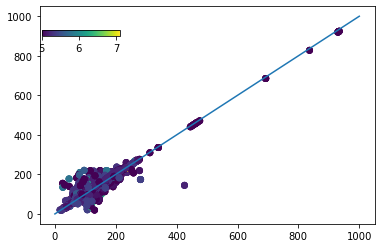

In [10]:
fig, ax = plt.subplots(1,1)
sc = ax.scatter(d_hyp, d_epi, c = m, cmap = 'viridis')
cax = fig.add_axes([0.13, 0.777, 0.18, 0.02]) # x0, y0, width, height
fig.colorbar(sc, cax=cax, orientation='horizontal')
ax.plot([0, 1000],[0,1000])

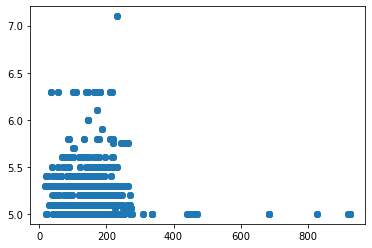

In [11]:
plt.scatter(d_epi,m)

In [12]:
dist

121.67880064748387

In [97]:
%conda install cartopy

.environ: No such file or directory.
Solving environment: done

## Package Plan ##

  environment location: /home/earthquakes1/software/Mageia8/anaconda3

  added / updated specs:
    - cartopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pyshp-2.2.0                |     pyhd8ed1ab_0          42 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          42 KB

The following NEW packages will be INSTALLED:

  cartopy            pkgs/main/linux-64::cartopy-0.18.0-py39h0d9ca2b_1
  geos               pkgs/main/linux-64::geos-3.8.0-he6710b0_0
  proj               conda-forge/linux-64::proj-6.2.1-hc80f0dc_0
  pyshp              conda-forge/noarch::pyshp-2.2.0-pyhd8ed1ab_0
  shapely            pkgs/main/linux-64::shapely-1.7.1-py39h1728cc4_0



pyshp-2.2.0          | 42 KB     | ###############################

In [98]:
cat_with_data.plot()

ImportError: Neither Basemap nor Cartopy could be imported.

In [35]:
a = tr.copy()

In [37]:
start

32770

In [38]:
end

33070

In [36]:
a.trim(start, end)

IQ.UNAP..HHZ | 2018-01-24T07:35:58.220000Z - 2018-01-24T07:35:58.220000Z | 100.0 Hz, 0 samples

In [39]:
tr

IQ.UNAP..HHZ | 2018-01-24T07:40:58.210000Z - 2018-01-24T07:51:19.620000Z | 100.0 Hz, 62142 samples

In [79]:
column

'6.9'

In [12]:
iv2

,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,...,6.1,6.2,6.3,6.4,6.5,6.6,6.7,6.8,6.9,7.0
0,"[1.02561318421e-06, 1.0811357819e-09, 1.081135...","[6.0540553638e-11, 6.0540553638e-11, 6.0540553...","[3.5182453078e-09, 3.5182453078e-09, 3.5182453...","[2.5483963428e-11, 2.5483963428e-11, 2.5483963...","[4.55016788123e-10, 1.5254887422e-10, 4.550167...","[3.69201274969e-08, 7.56635200923e-08, 3.69201...","[1.77738906616e-08, 1.06413874342e-07, 1.77738...","[2.67919617508e-08, 7.95453610569e-08, 1.03860...","[1.12594271984e-07, 1.12594271984e-07, 1.12594...","[1.76359254723e-09, 1.27248269495e-08, 1.25056...",...,[],[],[],[],[],[],[],[],[],[]
1,"[6.93210636979e-10, 6.93210636979e-10, 6.93210...","[4.88428454879e-10, 7.55609073052e-11, 4.88428...","[3.21325255183e-10, 4.84750937657e-09, 9.23577...","[4.47924240517e-10, 2.17678024718e-09, 1.10213...","[3.10481153794e-09, 9.27798903215e-10, 3.77248...","[2.73995568349e-10, 2.0754354506e-10, 1.842772...","[1.00790403804e-09, 9.57811392504e-09, 1.92258...","[1.35311710595e-08, 1.35311710595e-08, 1.35311...","[8.52310114279e-10, 8.52310114279e-10, 4.93043...","[1.06186769745e-09, 6.28811519624e-09, 1.17668...",...,[],[],[],[],[],[],[],[],[],[]
2,"[7.59375980206e-11, 9.60502766074e-11, 7.59375...","[1.05079998906e-11, 3.26116503919e-11, 2.25515...","[6.88447831487e-11, 3.34744301074e-12, 8.16238...","[1.63739478272e-11, 1.67202934029e-11, 3.09544...","[8.97627057333e-09, 3.65248280503e-08, 8.97627...","[5.46490067823e-11, 2.29999619623e-10, 5.43680...","[1.56881541048e-09, 1.03217719632e-10, 1.42326...","[2.15297662391e-09, 2.15297662391e-09, 2.15297...","[2.66337704413e-08, 1.89844697882e-09, 2.66337...","[1.35074212196e-10, 1.08163028751e-09, 3.01772...",...,[],[],[],[],[],[],[],[],[],[]
3,"[2.38862037752e-10, 2.96354019287e-11, 2.38862...","[6.54092051222e-12, 5.30353367047e-11, 6.54092...","[1.2894468404e-11, 6.36962917685e-11, 9.812669...","[4.41886766657e-12, 4.41886766657e-12, 4.41886...","[5.87001503678e-11, 5.87001503678e-11, 5.87001...","[1.09605476324e-11, 1.09003530809e-10, 6.60536...","[4.55356217139e-11, 2.67926947587e-10, 1.06288...","[6.49099992882e-11, 3.99660498093e-09, 1.53478...","[5.78682812573e-10, 5.78682812573e-10, 7.78940...","[2.31552940008e-09, 2.31552940008e-09, 2.31552...",...,[],[],[],[],[],[],"[4.66481449755e-05, 4.66481449755e-05]",[],[],[]
4,"[1.15003189072e-10, 1.15003189072e-10, 1.15003...","[3.07837230962e-11, 7.55318193503e-11, 1.10906...","[1.39792031142e-12, 6.65455951842e-11, 1.39792...","[1.2191872649e-10, 7.57251952537e-10, 1.219187...","[6.62767195672e-10, 5.96280332787e-10, 6.62767...","[4.84127337803e-10, 6.67375383102e-12, 7.94654...","[1.66412160771e-11, 5.08781352549e-11, 5.62063...","[2.39570932211e-10, 2.39570932211e-10, 2.39570...","[3.03506748625e-09, 3.03506748625e-09, 3.03506...","[1.27651890541e-09, 1.27651890541e-09, 1.27651...",...,[],[],[],[],[],[],[],[],[],[]
5,"[5.33637819424e-12, 5.33637819424e-12, 5.33637...","[2.23724662347e-10, 3.11888953664e-10, 2.23724...","[6.69805305748e-11, 6.69805305748e-11, 6.69805...","[1.21001613373e-09, 1.70683267916e-10, 1.21001...","[1.12228604219e-10, 1.12228604219e-10, 1.12228...","[2.54637005101e-10, 2.33285724088e-10, 2.54637...","[5.47450166103e-11, 1.41502042466e-10, 1.18709...","[1.63873811104e-09, 1.63873811104e-09, 1.63873...","[1.3742735743e-09, 1.95453202954e-09, 1.374273...","[8.27384194493e-12, 4.32548422758e-11, 6.42292...",...,[],[],[],[],[],[],[],[],[],[]
6,"[1.60953753288e-11, 3.97607323966e-10, 1.60953...","[2.21716956296e-11, 2.21716956296e-11, 2.21716...","[1.17057955797e-11, 1.17057955797e-11, 1.17057...","[1.51018728674e-10, 1.60696492606e-10, 1.51018...","[7.09144294532e-11, 7.09144294532e-11, 7.09144...","[3.65781727483e-10, 3.65781727483e-10, 3.65781...","[6.32047932272e-11, 6.32047932272e-11, 6.32047...","[1.75739883209e-10, 2.74919312273e-10, 1.75739...","[8.78673764461e-10, 3.38874942044e-10, 8.78673...","[7.49113158935e-10, 7.49113158935e-10, 7.49113...",...,[],[],[],[],[],

In [30]:
dist_corr_mult = np.array(list_dist)*np.array(list_iv2)

In [32]:
dist_corr_mult

array([  8.18598728e-08,   4.19874333e-07,   2.87510541e-07, ...,
         2.97936479e-08,   9.33029000e-07,   2.58409099e-09])

In [34]:
list_dist[0]*list_iv2[0]

8.1859872755096394e-08

In [71]:
import numpy as np
from scipy import optimize, linalg
import matplotlib.pyplot as plt

def obj(to_opt):
    a=to_opt[0]
    b=to_opt[1]
    #importance = np.array(n)
    y_real= np.log10(dist_corr_mult)
    x = np.array(list_mag)
    y_guess = (a*x+b)
    return sum(abs(y_guess-y_real))

In [72]:
res

 final_simplex: (array([[ 0.17015354,  4.74143195],
       [ 0.1701514 ,  4.74141395],
       [ 0.1701538 ,  4.74143318]]), array([ 4910.20048036,  4910.20053846,  4910.20056697]))
           fun: 4910.2004803581585
       message: 'Optimization terminated successfully.'
          nfev: 203
           nit: 107
        status: 0
       success: True
             x: array([ 0.17015354,  4.74143195])

Text(0.5, 1.0, 'log10(iv2) referenced to 1km by multiplying by distance')

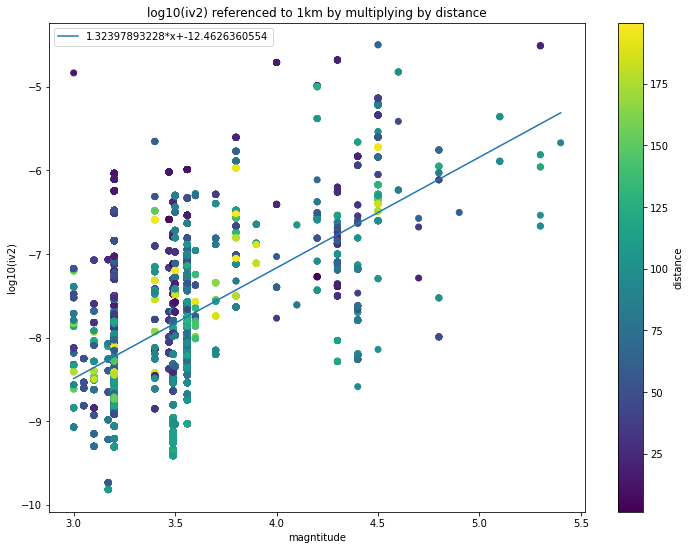

In [79]:
plt.figure(figsize=(12,9))
plt.scatter(list_mag, np.log10(dist_corr_mult),  c = list_dist, cmap = 'viridis')
plt.ylabel('log10(iv2)')
plt.xlabel('magntitude')
plt.colorbar(label = 'distance')
initial_guess = (1.4,0)
res = optimize.minimize(obj, initial_guess, method = 'Nelder-mead')
x = np.linspace(min(list_mag), max(list_mag), 20)
y = res.x[0] * x + res.x[1]
plt.plot(x,y, label = str(res.x[0]) + '*x+'+ str(res.x[1]))
#plt.vlines(res.x[0], 0 , 4, color='tab:blue', label = 'optimize.minimize all data, 1-norm')
plt.legend()
plt.title('log10(iv2) referenced to 1km by multiplying by distance')
#plt.ylim([0.0, 0.00001])
#plt.xscale('log')

In [67]:
x

array([  1.51982124e-10])

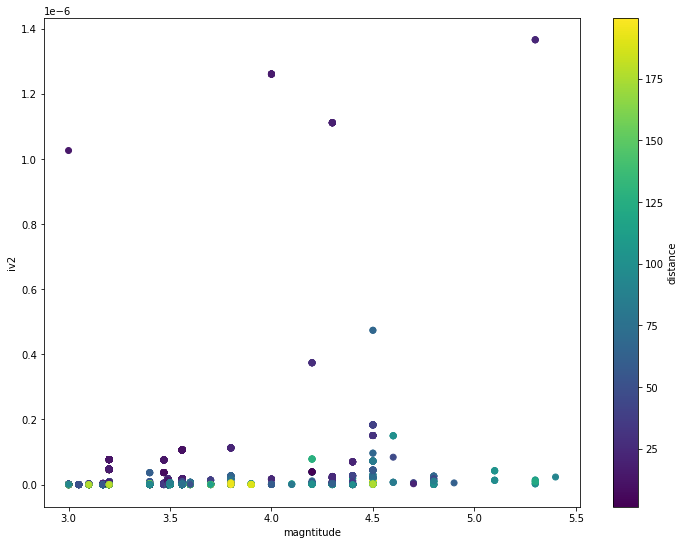

In [55]:
plt.figure(figsize=(12,9))
plt.scatter(list_mag, list_iv2, c = list_dist, cmap = 'viridis')
plt.ylabel('iv2')
plt.xlabel('magntitude')
plt.colorbar(label = 'distance')

In [23]:
fig, axs = plt.subplots(1, 1, figsize=(12.8,9))#iv2.shape[1]-1)
print('onto row/column plot')
row_count = 0
results = [[],[],[],[],[],[],[],[]]
for row in range(8): #rows are distances
    #print('for row')
    col_count = 0
    for column in iv2.columns[:-1]:
        for ind_ad in iv2[column][row]:
            axs.scatter(float(column), ind_ad, color='blue')
        #axs[row_count][col_count].set_xscale('log')
        #axs[row_count][col_count].set_yscale('log') # in log space
        col_count += 1
    row_count += 1


#axs[0][0].set_title('M5-6')
#axs[0][1].set_title('M6-7')
#axs[0][0].set_ylabel('0-25 km')
#axs[1][0].set_ylabel('25-50 km')
#axs[2][0].set_ylabel('50-75 km')
#axs[3][0].set_ylabel('75-100 km')
plt.ylabel('iv2')
plt.xlabel('magnitude')
plt.yscale('log')
plt.ylim([0.000001, 0.00000000000001])
plt.show()

onto row/column plot


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7ff7dbd89b80> (for post_execute):


KeyboardInterrupt: 

onto row/column plot


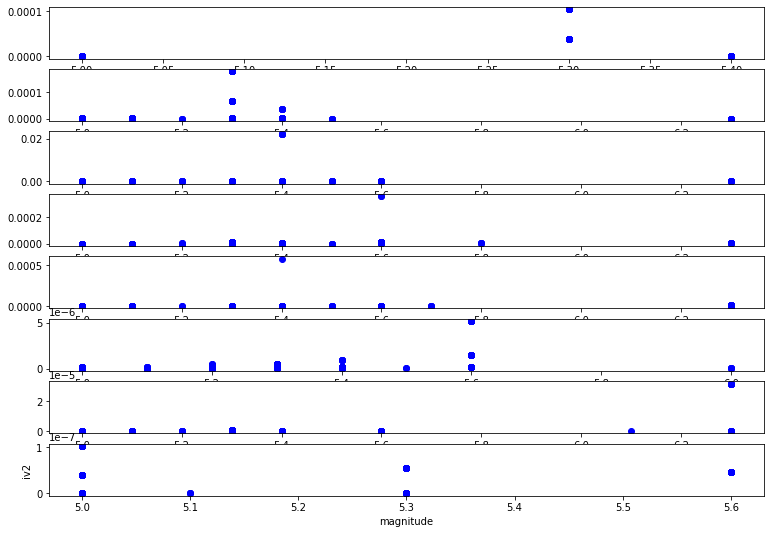

In [16]:
fig, axs = plt.subplots(8, 1, figsize=(12.8,9))#iv2.shape[1]-1)
print('onto row/column plot')
row_count = 0
results = [[],[],[],[],[],[],[],[]]
for row in range(8): #rows are distances
    #print('for row')
    col_count = 0
    for column in iv2.columns[:-1]:
        for ind_ad in iv2[column][row]:
            axs[row_count].scatter(float(column), ind_ad, color='blue')
        #axs[row_count][col_count].set_xscale('log')
        #axs[row_count][col_count].set_yscale('log') # in log space
        col_count += 1
    row_count += 1


#axs[0][0].set_title('M5-6')
#axs[0][1].set_title('M6-7')
#axs[0][0].set_ylabel('0-25 km')
#axs[1][0].set_ylabel('25-50 km')
#axs[2][0].set_ylabel('50-75 km')
#axs[3][0].set_ylabel('75-100 km')
plt.ylabel('iv2')
plt.xlabel('magnitude')
plt.show()

In [89]:
m = [] 
for e in cat_with_data:
    m.append(e.magnitudes[0].mag)

In [88]:
e.magnitudes[0].mag

5.0

In [90]:
min(m)

5.0

In [91]:
max(m)

7.5